In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #...
import math
myplate=sns.color_palette("Paired")
sns.set(style='white', palette=myplate)

import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
def bar_colorizer(n,*h1):
    colors=[]
    for i in range(n):
        if i+1 not in h1:
            colors.append('#ADD8E6')
        else:
            colors.append('#0D2241')
    return colors

print('^^Importing Important Stuff^^')

/kaggle/input/airbnb-amsterdam-dataset/listingsair.csv
^^Importing Important Stuff^^


# Loading the Dataset for Airbnb
At first we look at the columns available in the dataset and examples of the data contained in them

In [133]:
airbnb_path = "/kaggle/input/airbnb-amsterdam-dataset/listingsair.csv"
airbnb = pd.read_csv(airbnb_path, index_col = 'id')
airbnb.head()

,last_scraped,host_id,host_since,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,...,first_review,last_review,review_scores_rating,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
23726706,2022-06-05,122619127,2017-03-26,within an hour,f,1,1,t,IJburg - Zeeburgereiland,Private room in home,...,2018-03-26,2022-05-29,4.99,4.87,t,1,0,1,0,1.53
35815036,2022-06-05,269425139,2019-06-18,within an hour,t,1,1,t,Noord-Oost,Tiny home,...,2019-06-26,2022-06-02,4.96,4.83,f,1,1,0,0,2.65
31553121,2022-06-05,76806621,2016-06-09,within an hour,f,1,1,t,Noord-West,Entire guesthouse,...,2019-02-04,2022-05-29,4.74,4.59,f,1,1,0,0,2.02
34745823,2022-06-05,238083700,2019-01-21,within an hour,f,3,3,t,Gaasperdam - Driemond,Entire rental unit,...,2019-06-14,2022-04-17,4.87,4.90,f,3,3,0,0,1.08
44586947,2022-06-05,360838688,2020-08-06,within a few hours,t,0,0,f,Gaasperdam - Driemond,Private room in home,...,2020-08-16,2022-05-29,5.00,4.80,f,1,0,1,0,0.68


# Treating Missing Values
Next we determine if there are any missing values or not

In [134]:
airbnb.isnull().sum()

last_scraped                                       0
host_id                                            0
host_since                                         0
host_response_time                              1481
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_identity_verified                             0
neighbourhood_cleansed                             0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                    15
bedrooms                                         314
beds                                              91
amenities                                          0
price                                              0
minimum_nights                                     0
maximum_nights                                

We see null values in host_response_time, bathrooms_text, bedrooms, beds, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, first_review, last_review, review_scores_rating, review_scores_value, reviews_per_month. We will be replacing the null values in the column appropriately. In case of texts, we simply replace them with some placeholder. In the case of numeric values, the average is taken. 

In [135]:
airbnb['host_response_time'] = airbnb['host_response_time'].fillna('unknown')
airbnb['bathrooms_text'] = airbnb['bathrooms_text'].fillna('NA')
airbnb['bedrooms'] = airbnb['bedrooms'].fillna(airbnb['bedrooms'].mean())
airbnb['beds'] = airbnb['beds'].fillna(airbnb['beds'].mean())
airbnb['minimum_minimum_nights'] = airbnb['minimum_minimum_nights'].fillna(airbnb['minimum_minimum_nights'].mean())
airbnb['maximum_minimum_nights'] = airbnb['maximum_minimum_nights'].fillna(airbnb['maximum_minimum_nights'].mean())
airbnb['minimum_maximum_nights'] = airbnb['minimum_maximum_nights'].fillna(airbnb['minimum_maximum_nights'].mean())
airbnb['maximum_maximum_nights'] = airbnb['maximum_maximum_nights'].fillna(airbnb['maximum_maximum_nights'].mean())
airbnb['minimum_nights_avg_ntm'] = airbnb['minimum_nights_avg_ntm'].fillna(airbnb['minimum_nights_avg_ntm'].mean())
airbnb['maximum_nights_avg_ntm'] = airbnb['maximum_nights_avg_ntm'].fillna(airbnb['maximum_nights_avg_ntm'].mean())
airbnb['review_scores_value'] = airbnb['review_scores_value'].fillna(airbnb['review_scores_value'].mean())
airbnb['review_scores_rating'] = airbnb['review_scores_rating'].fillna(airbnb['review_scores_rating'].mean())

The number of missing values after the change is as below:

In [136]:
airbnb.isnull().sum()

last_scraped                                      0
host_id                                           0
host_since                                        0
host_response_time                                0
host_is_superhost                                 0
host_listings_count                               0
host_total_listings_count                         0
host_identity_verified                            0
neighbourhood_cleansed                            0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms_text                                    0
bedrooms                                          0
beds                                              0
amenities                                         0
price                                             0
minimum_nights                                    0
maximum_nights                                    0
minimum_mini

# Univariate Analysis
We will be exploring one variable at a time.


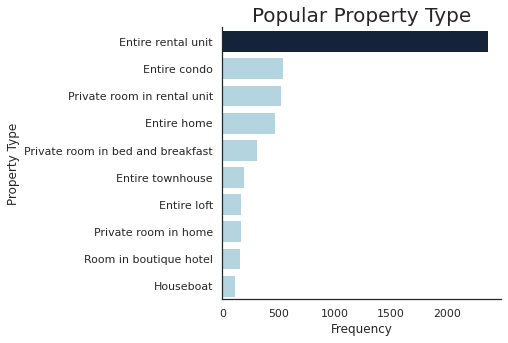

In [137]:
plt.figure(figsize= (5,5))
property_type=sns.countplot(y= "property_type", data = airbnb, order = airbnb["property_type"].value_counts()[:10].index, color = 'black', palette=bar_colorizer(10,1))
plt.title('Popular Property Type', fontsize = 20)
plt.ylabel('Property Type')
plt.xlabel('Frequency')
sns.despine()
plt.show()

The most popular property types included booking the entire thing. If not, then a private room is very likable to the customers.

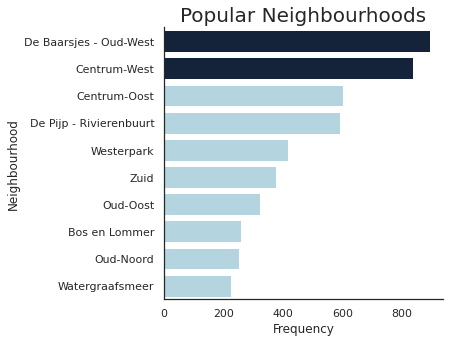

In [138]:
plt.figure(figsize= (5,5))
neighbourhood=sns.countplot(y= "neighbourhood_cleansed", data = airbnb, order = airbnb["neighbourhood_cleansed"].value_counts()[:10].index, color = 'black', palette=bar_colorizer(10,1,2))
plt.title('Popular Neighbourhoods', fontsize = 20)
plt.ylabel('Neighbourhood')
plt.xlabel('Frequency')
sns.despine()
plt.show()

The 2 most popular neighborhoods have frequency over 800

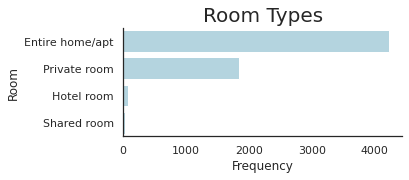

In [139]:
plt.figure(figsize= (5,2))
rooms=sns.countplot(y= "room_type", data = airbnb, order = airbnb["room_type"].value_counts()[:10].index, color = 'black', palette=bar_colorizer(4))
plt.title('Room Types', fontsize = 20)
plt.ylabel('Room')
plt.xlabel('Frequency')
sns.despine()
plt.show()

It is kinda obvious, because people would not look in AirBnB if hotel rooms are what they wanted. Being the only resident at the place of booking seemed to be what the customers wanted from AirBnB

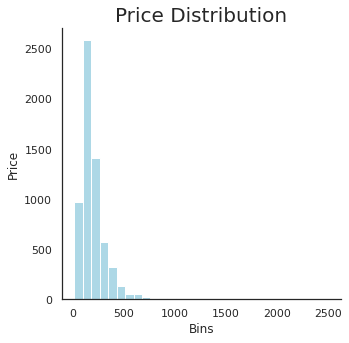

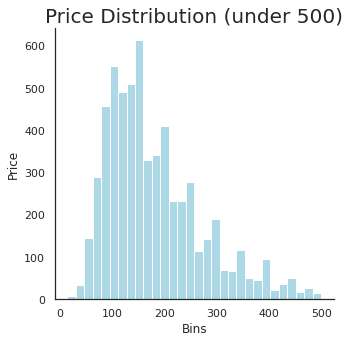

In [156]:
plt.figure(figsize= (5,5))
airbnb.price.hist(bins =30, grid=False, color='#ADD8E6',)
plt.title('Price Distribution', fontsize = 20)
plt.ylabel('Price')
plt.xlabel('Bins')
sns.despine()
plt.figure(figsize= (5,5))
airbnb[airbnb["price"]<500].price.hist(bins =30, grid=False, color='#ADD8E6')
plt.title('Price Distribution (under 500)', fontsize = 20)
plt.ylabel('Price')
plt.xlabel('Bins')
sns.despine()
plt.show()

Most of the room prices ranged within 100 and 200. Although it is seen that there are some extreme values like the price of 2500 unit.

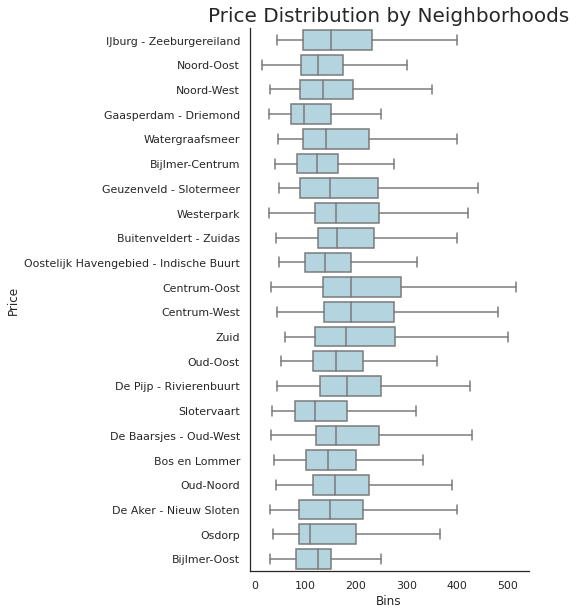

In [159]:
plt.figure(figsize= (5,10))
sns.boxplot(y='neighbourhood_cleansed', x="price", data=airbnb,color = '#ADD8E6', showfliers = False)
plt.title('Price Distribution by Neighborhoods', fontsize = 20)
plt.ylabel('Price')
plt.xlabel('Bins')
sns.despine()

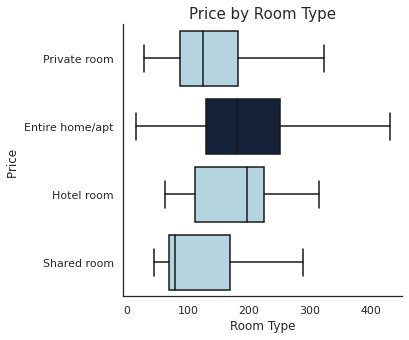

In [143]:
plt.figure(figsize= (5,5))
sns.boxplot(data=airbnb, x='price', y='room_type', palette=bar_colorizer(4,2),showfliers=False)
plt.title("Price by Room Type",fontsize=15)
plt.xlabel("Room Type")
plt.ylabel("Price ")
sns.despine()

Just as the Entire home/apt room type was the most popular, it also had a higher price. On the other hand, private rooms despite beeing much more popular than hotel rooms, had a lower price. Shared rooms are less popular as well as cheaper in general. It can be summarized as follows.

In [168]:
airbnb.groupby("room_type").agg(average_price=("price","mean"), popularity=("price","count")).sort_values(by = 'average_price').reset_index()

,room_type,average_price,popularity
0,Shared room,148.781250,32
1,Private room,155.587500,1840
2,Hotel room,198.207852,78
3,Entire home/apt,217.252901,4223


**This is actually taking a lot of time. Let's just view all the distributions at a glance**
# Analyzing Numeric Features

In [148]:
airbnb_columns=[]
for col in airbnb.columns:
    airbnb_columns.append(col)
airbnb_columns #listing all columns

cate=[]
for airbnb_col in airbnb_columns:
    if airbnb[airbnb_col].dtypes == 'object':
        cate.append(airbnb_col) #listing categorical variables

nume=[]
for airbnb_col in airbnb_columns:
    if airbnb_col not in cate:
        nume.append(airbnb_col) #listing numeric 

cate=['host_is_superhost', 'host_identity_verified', 'room_type', 'has_availability', 'instant_bookable']

In [149]:
m=math.ceil(math.sqrt(len(nume)))
n=math.ceil(len(nume)/m)

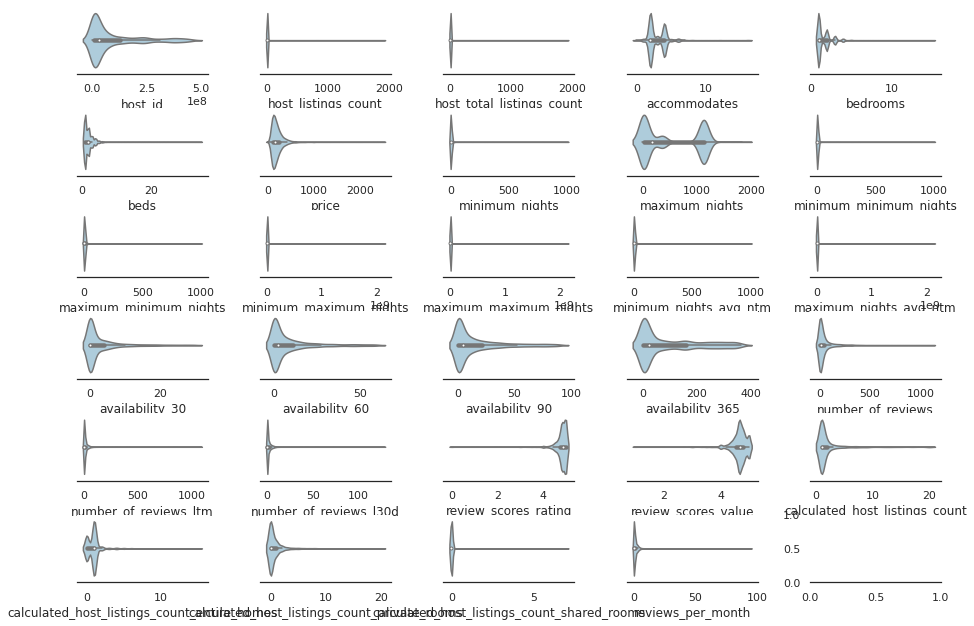

In [150]:
fig, axes = plt.subplots(m,n,figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
sns.despine(left=True)
for i in range(m):
    for j in range(n):
        sns.violinplot(ax=axes[i,j], data=airbnb, x=nume[i*n+j])
        
        if i*n+j==len(nume)-1:
            break

*Just the same thing in a different way below*

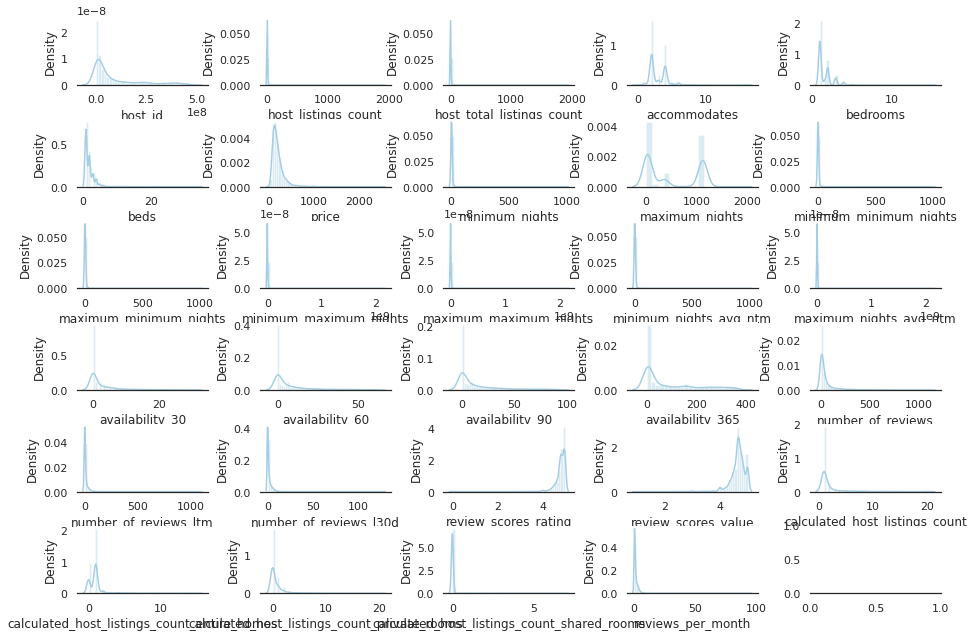

In [151]:
fig, axes = plt.subplots(m,n,figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
sns.despine(left=True)
for i in range(m):
    for j in range(n):
        sns.distplot(airbnb[nume[i*n+j]],ax=axes[i,j])
        if i*n+j==len(nume)-1:
            break

# Analyzing Categorical Features
Let's see how many of the values belong to the different categories

In [152]:
for col in cate:
    print('-'*40)
    print(f'The column name is: {col}')
    print(airbnb[col].value_counts())

----------------------------------------
The column name is: host_is_superhost
f    5091
t    1082
Name: host_is_superhost, dtype: int64
----------------------------------------
The column name is: host_identity_verified
t    5084
f    1089
Name: host_identity_verified, dtype: int64
----------------------------------------
The column name is: room_type
Entire home/apt    4223
Private room       1840
Hotel room           78
Shared room          32
Name: room_type, dtype: int64
----------------------------------------
The column name is: has_availability
t    6166
f       7
Name: has_availability, dtype: int64
----------------------------------------
The column name is: instant_bookable
f    4153
t    2020
Name: instant_bookable, dtype: int64


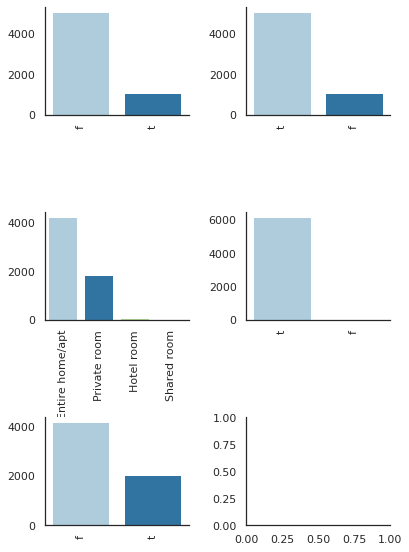

In [153]:
m=math.ceil(math.sqrt(len(cate)))
n=math.ceil(len(cate)/m)
fig, axes = plt.subplots(m,n,figsize=(6,9))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)

sns.despine()
for i in range(m):
    for j in range(n):
        sns.barplot(x= airbnb[cate[i*n+j]].value_counts().index,
                    y= airbnb[cate[i*n+j]].value_counts().values,
                   ax=axes[i,j])
        axes[i,j].tick_params(axis='x', labelrotation=90)
        
        if i*n+j==len(cate)-1:
            break

# Multivariate Analysis
This is an attempt to understand the interrelation between different vairables


The correlation between the different variables

In [171]:
airbnb.corr()

,host_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
host_id,1.000000,0.040241,0.040241,-0.021895,-0.090431,-0.013149,0.111333,-0.027211,-0.001966,-0.026072,...,-0.116426,0.124117,0.108100,-0.140179,-0.108241,0.238699,0.015695,0.227004,0.112407,0.178422
host_listings_count,0.040241,1.000000,1.000000,0.003848,-0.016140,0.001938,0.013444,0.007132,0.030453,0.007407,...,0.000253,0.010908,-0.003006,-0.057170,-0.074065,0.096521,0.062773,0.061211,0.010366,0.010231
host_total_listings_count,0.040241,1.000000,1.000000,0.003848,-0.016140,0.001938,0.013444,0.007132,0.030453,0.007407,...,0.000253,0.010908,-0.003006,-0.057170,-0.074065,0.096521,0.062773,0.061211,0.010366,0.010231
accommodates,-0.021895,0.003848,0.003848,1.000000,0.737547,0.823480,0.455941,-0.005384,-0.010557,-0.005137,...,-0.090265,-0.051826,-0.065917,-0.039982,-0.072524,-0.030818,0.133069,-0.092435,-0.034372,-0.081894
bedrooms,-0.090431,-0.016140,-0.016140,0.737547,1.000000,0.734583,0.406484,0.000388,-0.036589,-0.000086,...,-0.154905,-0.103132,-0.122997,0.006810,-0.009268,-0.115540,0.074709,-0.158036,-0.055321,-0.143728
beds,-0.013149,0.001938,0.001938,0.823480,0.734583,1.000000,0.386930,-0.014331,-0.000917,-0.014389,...,-0.059454,-0.037987,-0.050798,-0.053846,-0.069152,0.024774,0.091906,-0.009017,-0.008718,-0.059405
price,0.111333,0.013444,0.013444,0.455941,0.406484,0.386930,1.000000,-0.008610,-0.014171,-0.008172,...,-0.163996,-0.051318,-0.076725,-0.001274,-0.073468,0.066181,0.161810,-0.037138,0.015855,-0.074900
minimum_nights,-0.027211,0.007132,0.007132,-0.005384,0.000388,-0.014331,-0.008610,1.000000,0.024230,0.998754,...,-0.020433,-0.021973,-0.020386,0.008210,0.015280,-0.011284,0.026435,-0.025694,-0.008309,-0.018968
maximum_nights,-0.001966,0.030453,0.030453,-0.010557,-0.036589,-0.000917,-0.014171,0.024230,1.000000,0.025315,...,0.048167,0.053794,0.032475,-0.050365,-0.046681,0.126423,-0.019037,0.127272,-0.002442,0.019037
minimum_minimum_nights,-0.026072,0.007407,0.007407,-0.005137,-0.000086,-0.014389,-0.008172,0.998754,0.025315,1.000000,...,-0.021487,-0.022360,-0.020912,0.006748,0.014016,-0.010206,0.027394,-0.025228,-0.007656,-0.019434


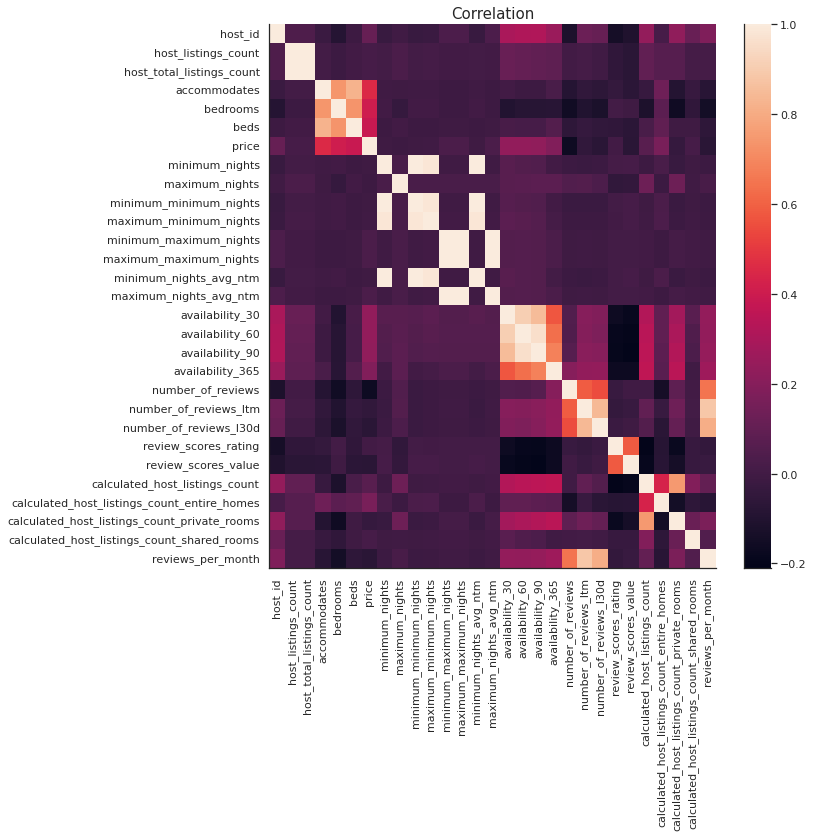

In [174]:
plt.figure(figsize= (10,10))
sns.heatmap(airbnb.corr())
plt.title("Correlation",fontsize=15)
sns.despine()

Correlations with price only

In [144]:
airbnb.corrwith(airbnb['price']).sort_values(ascending = False)

price                                           1.000000
accommodates                                    0.455941
bedrooms                                        0.406484
beds                                            0.386930
availability_60                                 0.234506
availability_30                                 0.232163
availability_90                                 0.229420
availability_365                                0.182632
calculated_host_listings_count_entire_homes     0.161810
host_id                                         0.111333
calculated_host_listings_count                  0.066181
maximum_maximum_nights                          0.029401
maximum_nights_avg_ntm                          0.029401
minimum_maximum_nights                          0.029401
calculated_host_listings_count_shared_rooms     0.015855
host_listings_count                             0.013444
host_total_listings_count                       0.013444
review_scores_rating           

Top 10 correlations with price

In [145]:
airbnb.corrwith(airbnb['price']).abs().sort_values(ascending = False)[1:11]

accommodates                                   0.455941
bedrooms                                       0.406484
beds                                           0.386930
availability_60                                0.234506
availability_30                                0.232163
availability_90                                0.229420
availability_365                               0.182632
number_of_reviews                              0.163996
calculated_host_listings_count_entire_homes    0.161810
host_id                                        0.111333
dtype: float64

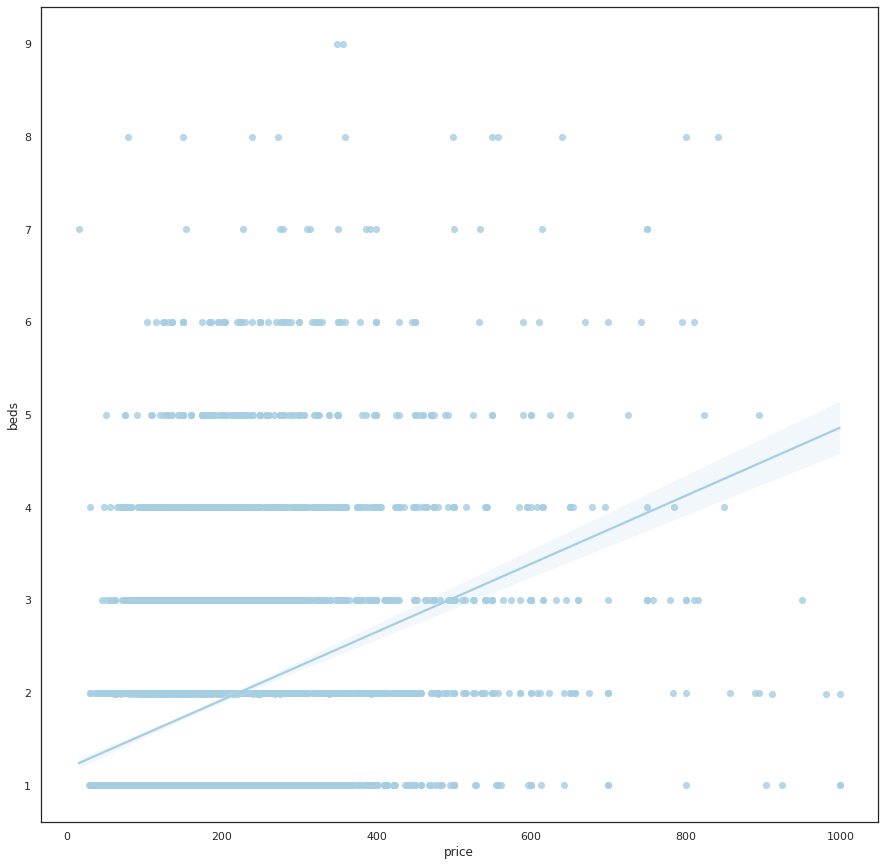

In [146]:
plt.figure(figsize= (15,15))
regplot = sns.regplot(x='price', y ='beds', data=airbnb[(airbnb['price']<1000) & (airbnb['beds']<10)])

Random visualization

# Its Incomplete